## Sales Analysis

### import the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import os
%matplotlib inline


# load the data

### merge the csv files into one file


In [2]:
#define path to CSV files
path = 'D:\\Sales_Data'

#identify all CSV files
all_files = os.listdir(path)

for l in range (len(all_files)):
    all_files[l] ='D:\\Sales_Data\\' + all_files[l]

#merge all CSV files into one DataFrame
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


# clean the data 

In [3]:
values = df.isnull()
for i in values.columns.values.tolist():
    print(values[[i]].value_counts())
    

Order ID
False       186305
True           545
Name: count, dtype: int64
Product
False      186305
True          545
Name: count, dtype: int64
Quantity Ordered
False               186305
True                   545
Name: count, dtype: int64
Price Each
False         186305
True             545
Name: count, dtype: int64
Order Date
False         186305
True             545
Name: count, dtype: int64
Purchase Address
False               186305
True                   545
Name: count, dtype: int64


In [4]:
df.dropna(inplace=True)

In [5]:
value = "Order ID"
 
result = df[df['Order ID'] == value]
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
df.drop(result.index.tolist(),inplace=True)


### save the data

In [7]:
df.to_csv('D:\\all_data.csv',index=False)

### read the new data

In [8]:
data=pd.read_csv('D:\\all_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


remove the headers of other files from our dataframe 

# formating the data

In [9]:
data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [10]:
data["Order Date"] =pd.to_datetime(data["Order Date"])


C:\Users\ELmasry\AppData\Local\Temp\ipykernel_6920\962844474.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Order Date"] =pd.to_datetime(data["Order Date"])


In [11]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


## find the best sales month

In [12]:
new_data=data.copy()
new_data["month"] =pd.DatetimeIndex(new_data['Order Date']).month
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [13]:
new_data["final price"] = new_data["Quantity Ordered"] * new_data["Price Each"]
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,final price
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [14]:
sales = {}
for i in range(1,13):
    sales[i]=new_data.loc[new_data['month'] == i, 'final price'].sum()

In [15]:
best_month = [k  for k, v in sales.items() if v == max(sales.values())]
print ("the best month sales is  " , best_month," with sales = ",max(sales.values()))

the best month sales is   [12]  with sales =  4613443.34


Text(0.5, 1.0, 'the best month in sales')

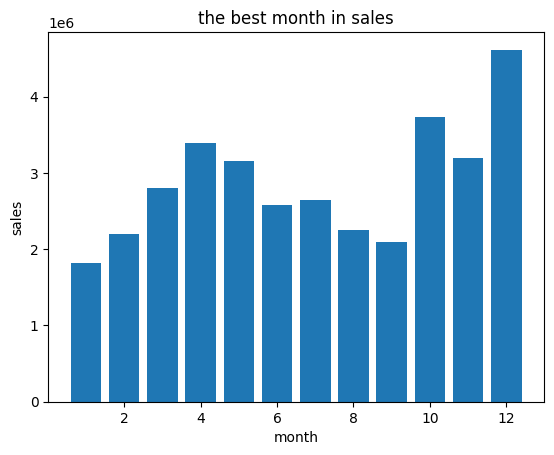

In [16]:
plt.bar(sales.keys(),sales.values())
plt.xlabel("month")
plt.ylabel("sales")
plt.title("the best month in sales")

### find the best sales city

In [17]:
def strips(x):
    return (str(x).split(",")[1]) +" "+"("+ (str(x).split(",")[2]).split(" ")[1]+")"

new_data["city"]  = new_data["Purchase Address"].apply(lambda x: strips(x)  )
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,final price,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [18]:
best_city=new_data[["final price","city"]].groupby("city").sum()
best_city

,final price
city,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Portland (ME),449758.27
Portland (OR),1870732.34
San Francisco (CA),8262203.91


In [19]:
best_city.max()

final price    8262203.91
dtype: float64

Text(0.5, 1.0, 'the best city in sales')

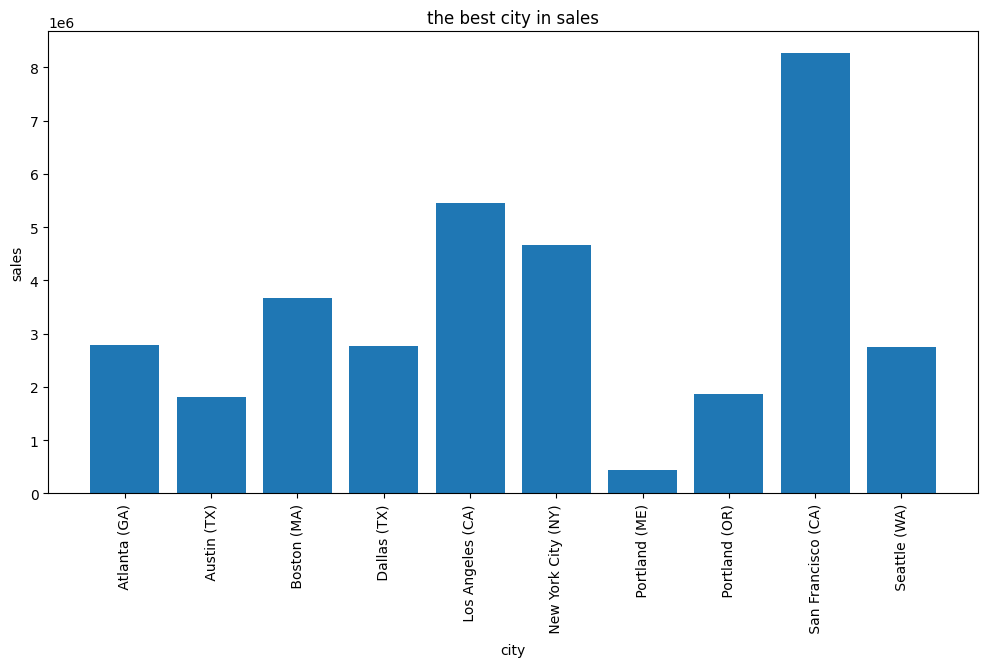

In [20]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=100)
plt.bar(best_city.index.tolist(),best_city["final price"])
plt.xticks(best_city.index.tolist(),rotation="vertical")
plt.xlabel("city")
plt.ylabel("sales")
plt.title("the best city in sales")


### what time should we display the advertisement

In [21]:
new_data["hour"] =pd.DatetimeIndex(new_data['Order Date']).hour
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,final price,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [22]:
best_time = new_data[["hour","final price"]].groupby("hour").count()
best_time

,final price
hour,
0,3910
1,2350
2,1243
3,831
4,854
5,1321
6,2482
7,4011
8,6256


Text(0.5, 1.0, 'the best time in orders')

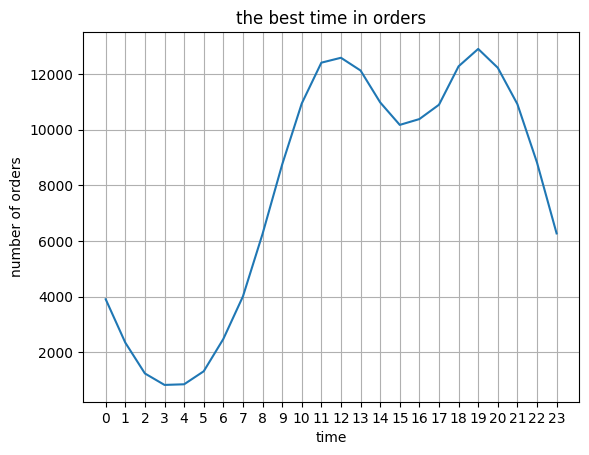

In [23]:
plt.plot(best_time.index.tolist(),best_time["final price"])
plt.xticks(best_time.index.tolist())
plt.xlabel("time")
plt.ylabel("number of orders")
plt.grid()
plt.title("the best time in orders")
#maybe before 11 am (11)or around 7 pm (19)

### plot ecach city separately to know what time is the best for each one

In [24]:
best = new_data[["hour","city","final price"]].groupby(["city","hour"]).count()
best

final price
city          hour             
 Atlanta (GA) 0             310
              1             213
              2             113
              3              57
              4              80
...                         ...
 Seattle (WA) 19            989
              20            988
              21            869
              22            693
              23            551

[240 rows x 1 columns]

In [25]:
cities=[]
times= []
for i in best.index.tolist():
    for x in list(i):
        if type(x) == str:
            cities.append(x)
        else:
            times.append(x)

    


cities=[cities[x] for x in range(0,len(cities),24)]      
print(cities)
print(times[0:24])


[' Atlanta (GA)', ' Austin (TX)', ' Boston (MA)', ' Dallas (TX)', ' Los Angeles (CA)', ' New York City (NY)', ' Portland (ME)', ' Portland (OR)', ' San Francisco (CA)', ' Seattle (WA)']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [26]:
best.iloc[0:24,0]

city           hour
 Atlanta (GA)  0        310
               1        213
               2        113
               3         57
               4         80
               5         98
               6        192
               7        349
               8        509
               9        735
               10       783
               11       992
               12      1020
               13       963
               14       887
               15       783
               16       830
               17       896
               18       937
               19      1047
               20       957
               21       892
               22       719
               23       519
Name: final price, dtype: int64

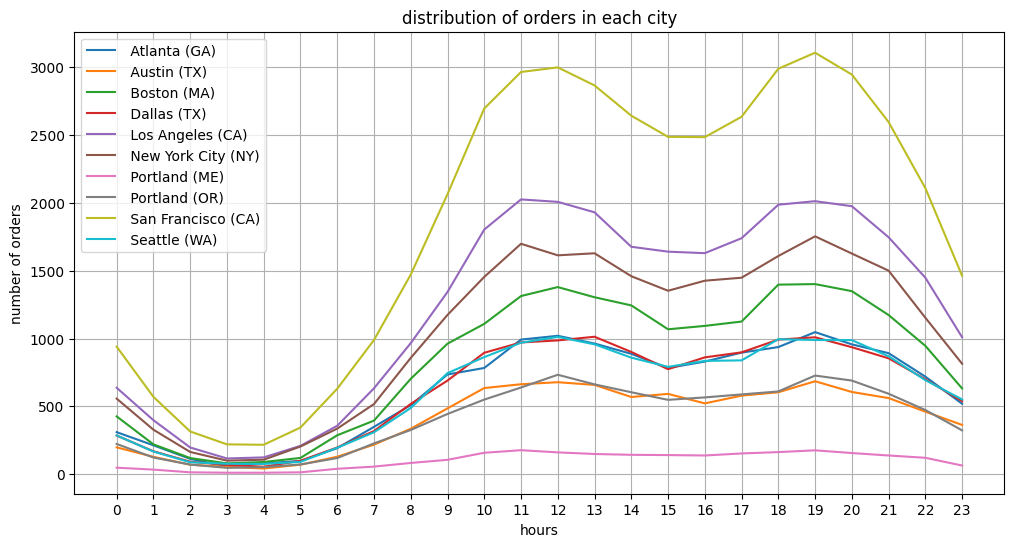

In [27]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=100)

plt.plot(times[0:24], best.iloc[0:24,0] ,label = cities[0])
plt.plot(times[0:24], best.iloc[24:48,0] ,label = cities[1])
plt.plot(times[0:24], best.iloc[48:72,0],label = cities[2])
plt.plot(times[0:24], best.iloc[72:96,0],label = cities[3])
plt.plot(times[0:24], best.iloc[96:120,0],label = cities[4])
plt.plot(times[0:24], best.iloc[120:144,0],label = cities[5])
plt.plot(times[0:24], best.iloc[144:168,0],label = cities[6])
plt.plot(times[0:24], best.iloc[168:192,0],label = cities[7])
plt.plot(times[0:24], best.iloc[192:216,0],label = cities[8])
plt.plot(times[0:24], best.iloc[216:240,0],label = cities[9])

plt.xticks(times[0:24])

plt.xlabel("hours")
plt.ylabel("number of orders")
plt.title("distribution of orders in each city")

plt.legend()
plt.grid()
plt.show()
# it seems that all has almost the same distribuation
# maybe before 11 am (11)or around 7 pm (19)

### what proudct are often soled together

In [28]:
# work with the orginal dataframe in case any bad thing happended
data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [29]:
df = data[data["Order ID"].duplicated(keep=False)]
df["grouped"] =df.groupby("Order ID")["Product"].transform(lambda x :",".join(x))
df=df[["Order ID","grouped"]].drop_duplicates()
df.head(10)


C:\Users\ELmasry\AppData\Local\Temp\ipykernel_6920\244927338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["grouped"] =df.groupby("Order ID")["Product"].transform(lambda x :",".join(x))


,Order ID,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
188,176739,"34in Ultrawide Monitor,Google Phone"
224,176774,"Lightning Charging Cable,USB-C Charging Cable"
232,176781,"iPhone,Lightning Charging Cable"


In [30]:
# count paires
from itertools import combinations
from collections import Counter

count= Counter()

for row in df["grouped"]:
    my_list=row.split(",")
    count.update(Counter(combinations(my_list,2)))
#most 20 two prouducts sold togther    
count.most_common(20)
# you can use this in advertisement

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

### what proudct sold the most 

In [31]:
df = data[["Product","Quantity Ordered","Price Each","Purchase Address"]].groupby("Product").sum()
df.head()

,Quantity Ordered,Price Each,Purchase Address
Product,,,
20in Monitor,4129,451068.99,"765 Cherry St, Seattle, WA 98101804 Church St,..."
27in 4K Gaming Monitor,6244,2429637.70,"657 Hill St, Dallas, TX 7500187 West St, Bosto..."
27in FHD Monitor,7550,1125974.93,"557 5th St, Los Angeles, CA 90001807 12th St, ..."
34in Ultrawide Monitor,6199,2348718.19,"678 Hickory St, Portland, OR 97035661 Washingt..."
AA Batteries (4-pack),27635,79015.68,"186 12th St, Dallas, TX 75001886 Jefferson St,..."


Text(0.5, 1.0, 'the proudct sold the most')

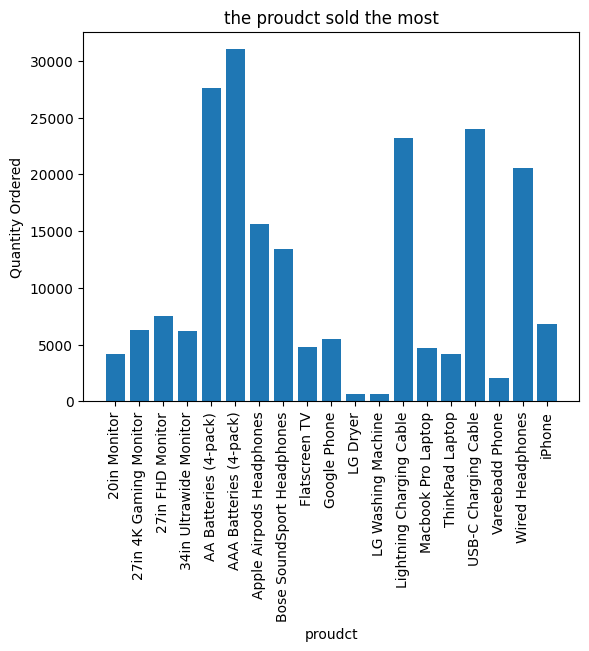

In [32]:
plt.bar(df.index.tolist(),df["Quantity Ordered"])
plt.xticks(df.index.tolist(),rotation="vertical")
plt.xlabel("proudct")
plt.ylabel("Quantity Ordered")
plt.title("the proudct sold the most")

 ### why these proudcts are the most sold ?

In [33]:
prices =data[["Product","Quantity Ordered","Price Each"]].groupby("Product").mean()["Price Each"]
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [34]:
np.array(df["Quantity Ordered"])

array([ 4129,  6244,  7550,  6199, 27635, 31017, 15661, 13457,  4819,
        5532,   646,   666, 23217,  4728,  4130, 23975,  2068, 20557,
        6849], dtype=int64)

C:\Users\ELmasry\AppData\Local\Temp\ipykernel_6920\1515337821.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df.index.tolist(),rotation="vertical")


Text(0.5, 1.0, 'the proudct sold the most')

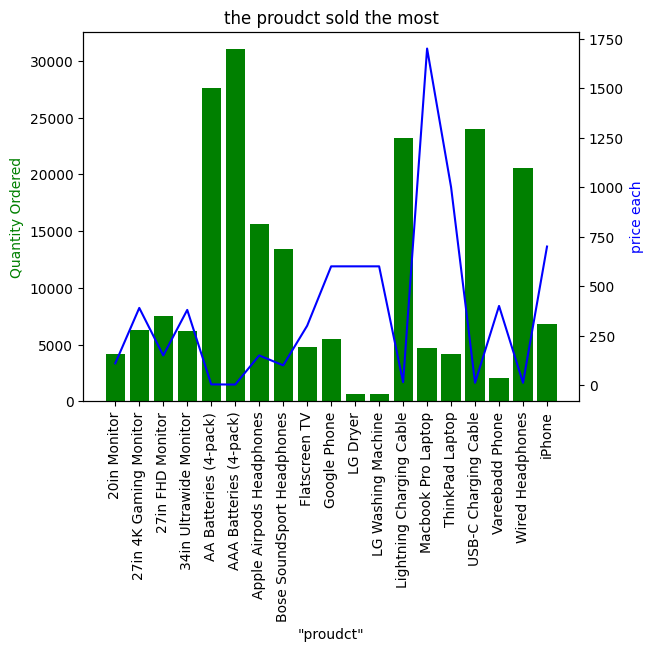

In [35]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(df.index.tolist(),df["Quantity Ordered"],color="green")
ax2.plot(df.index.tolist(),prices,'b-')

ax1.set_xticklabels(df.index.tolist(),rotation="vertical")
ax1.set_xlabel('"proudct"')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('price each', color='b')

plt.title("the proudct sold the most")

### conclusion the high price proudct has a low sales and low price proudct has a high sales 